In [4]:
import pandas as pd

In [53]:
# Task 1: Working with Series 
# 1. Create a Pandas Series from the following list:  
# 2. Write a Python program to:  
    # o Assign custom indices ['A', 'B', 'C', 'D', 'E'] to the Series. 
    # o Display the first three elements of the Series. 
    # o Calculate the mean, median, and standard deviation of the Series.


data = [25, 30, 35, 40, 45]
ser = pd.Series(data)
print(ser)

ser.index = ['A', 'B', 'C', 'D', 'E']
print("First Three elements : ",ser[:3])

print("Mean : ",ser.mean())
print("Median : ",ser.median())
print("Standard Deviation : ",ser.std())

0    25
1    30
2    35
3    40
4    45
dtype: int64
First Three elements :  A    25
B    30
C    35
dtype: int64
Mean :  35.0
Median :  35.0
Standard Deviation :  7.905694150420948


In [54]:
# Task 2: Creating and Inspecting DataFrames
# 1. Create a Pandas DataFrame 
# 2. Write a Python program to: 
#     o Display the first two rows of the DataFrame. 
#     o Display the column names, data types, and summary statistics. 
#     o Add a new column Passed that contains True if Marks >= 80 and False otherwise. 

data = {
    'Name': ['Alice', 'Bob', 'Carol', 'David', 'Eve'],
    'Age': [20, 22, 19, 21, 20],
    'Gender': ['Female', 'Male', 'Female', 'Male', 'Female'],
    'Marks': [85, 78, 92, 74, 88]
}
df = pd.DataFrame(data)
print("First two rows\n",df.head(2))

print("column name : ",df.columns)

# summary statistics. 
print(df.describe(include='all'))

print()

df["Passed"] = df['Marks']>=80
print(df)

First two rows
     Name  Age  Gender  Marks
0  Alice   20  Female     85
1    Bob   22    Male     78
column name :  Index(['Name', 'Age', 'Gender', 'Marks'], dtype='object')
         Name        Age  Gender      Marks
count       5   5.000000       5   5.000000
unique      5        NaN       2        NaN
top     Alice        NaN  Female        NaN
freq        1        NaN       3        NaN
mean      NaN  20.400000     NaN  83.400000
std       NaN   1.140175     NaN   7.334848
min       NaN  19.000000     NaN  74.000000
25%       NaN  20.000000     NaN  78.000000
50%       NaN  20.000000     NaN  85.000000
75%       NaN  21.000000     NaN  88.000000
max       NaN  22.000000     NaN  92.000000

    Name  Age  Gender  Marks  Passed
0  Alice   20  Female     85    True
1    Bob   22    Male     78   False
2  Carol   19  Female     92    True
3  David   21    Male     74   False
4    Eve   20  Female     88    True


In [55]:
# Task 3: Data Selection and Filtering
# 1. Using the DataFrame from Task 2, write a Python program to:
#       o Select and display the Name and Marks columns.
#       o Filter and display records where Marks > 80.
#       o Display the record of the student with the highest marks.

# going to use df as dataframe
print(df[['Marks','Name']])

print()

print(df[df['Marks']>80])

print()
# maximum marks
print(df[df['Marks'].max()==df['Marks']])

   Marks   Name
0     85  Alice
1     78    Bob
2     92  Carol
3     74  David
4     88    Eve

    Name  Age  Gender  Marks  Passed
0  Alice   20  Female     85    True
2  Carol   19  Female     92    True
4    Eve   20  Female     88    True

    Name  Age  Gender  Marks  Passed
2  Carol   19  Female     92    True


In [56]:
# Task 4: Handling Missing Data
# 1. Modify the DataFrame from Task 2 by introducing missing values:
# 2. df.loc[1, 'Marks'] = None
# 3. df.loc[4, 'Age'] = None
# 4. Write a Python program to:
#       o Identify missing values in the DataFrame.
#       o Fill missing values in the Marks column with the column's mean.
#       o Drop rows where the Age column has missing values.

# using df as dataframe
df.loc[1, 'Marks'] = None
df.loc[4, 'Age'] = None
print(df.isnull())

print()

mean = df['Marks'].mean()
df['Marks'] = df['Marks'].fillna(mean)
print(df)

print()

df_modified = df.dropna(subset=['Age'])
print(df_modified)


    Name    Age  Gender  Marks  Passed
0  False  False   False  False   False
1  False  False   False   True   False
2  False  False   False  False   False
3  False  False   False  False   False
4  False   True   False  False   False

    Name   Age  Gender  Marks  Passed
0  Alice  20.0  Female  85.00    True
1    Bob  22.0    Male  84.75   False
2  Carol  19.0  Female  92.00    True
3  David  21.0    Male  74.00   False
4    Eve   NaN  Female  88.00    True

    Name   Age  Gender  Marks  Passed
0  Alice  20.0  Female  85.00    True
1    Bob  22.0    Male  84.75   False
2  Carol  19.0  Female  92.00    True
3  David  21.0    Male  74.00   False


In [57]:
# Task 5: Grouping and Aggregation
# 1. Using the DataFrame from Task 2, write a Python program to:
#       o Group the data by Gender and calculate the mean age and marks for each gender.
#       o Count the number of students in each gender group.

print(df.groupby('Gender')[['Age','Marks']].mean())

print(df['Gender'].value_counts())

         Age      Marks
Gender                 
Female  19.5  88.333333
Male    21.5  79.375000
Gender
Female    3
Male      2
Name: count, dtype: int64


In [64]:
# Task 6: Reading and Writing Data
# 1. Write a Python program to:
#       o Save the modified DataFrame from Task 4 to a CSV file named students_data.csv.
#       o Read the CSV file into a new DataFrame.
#       o Display the first five rows of the newly loaded DataFrame.

# Let's use the modified schema df_modified

# index=false turned off the indexing for store purpose only
df_modified.to_csv('students_data.csv', index=False)

# data having only 4 rows
readData = pd.read_csv('students_data.csv')
print(readData.head(5))

    Name   Age  Gender  Marks  Passed
0  Alice  20.0  Female  85.00    True
1    Bob  22.0    Male  84.75   False
2  Carol  19.0  Female  92.00    True
3  David  21.0    Male  74.00   False


In [1]:
# Task 7: General
# 1. Download a sample dataset from Kaggle or use any public dataset.
# 2. Write a Python program to:
#       o Load the dataset using Pandas.
#       o Perform exploratory data analysis (EDA) by summarizing key statistics, checking for missing values, and visualizing data trends using Matplotlib or Seaborn.
#       o Document your findings in Markdown or comments.


In [6]:
data = pd.read_csv("Students Social Media Addiction.csv")
data

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,701,20,Female,Undergraduate,Italy,4.7,TikTok,No,7.2,7,In Relationship,2,5
701,702,23,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4,Single,5,9
702,703,21,Female,Undergraduate,China,5.6,WeChat,Yes,6.7,6,In Relationship,3,7
703,704,24,Male,Graduate,Japan,4.3,Twitter,No,7.5,8,Single,2,4


In [8]:
# overview of file
data.describe

<bound method NDFrame.describe of      Student_ID  Age  Gender Academic_Level     Country  \
0             1   19  Female  Undergraduate  Bangladesh   
1             2   22    Male       Graduate       India   
2             3   20  Female  Undergraduate         USA   
3             4   18    Male    High School          UK   
4             5   21    Male       Graduate      Canada   
..          ...  ...     ...            ...         ...   
700         701   20  Female  Undergraduate       Italy   
701         702   23    Male       Graduate      Russia   
702         703   21  Female  Undergraduate       China   
703         704   24    Male       Graduate       Japan   
704         705   19  Female  Undergraduate      Poland   

     Avg_Daily_Usage_Hours Most_Used_Platform Affects_Academic_Performance  \
0                      5.2          Instagram                          Yes   
1                      2.1            Twitter                           No   
2                      

In [9]:
# check for null
data.isnull().sum()

Student_ID                      0
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Avg_Daily_Usage_Hours', ylabel='Count'>

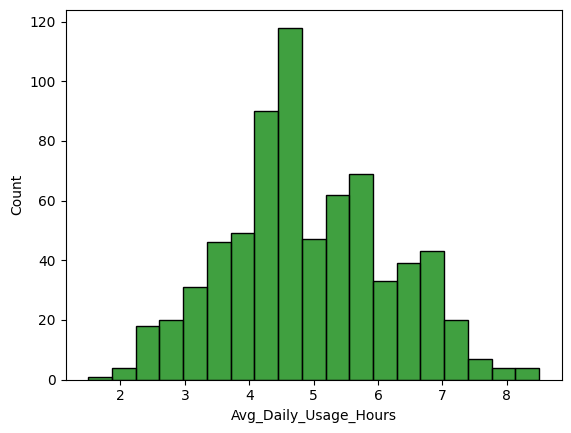

In [34]:
# how many students use how much hours
sns.histplot(data["Avg_Daily_Usage_Hours"],color='green')

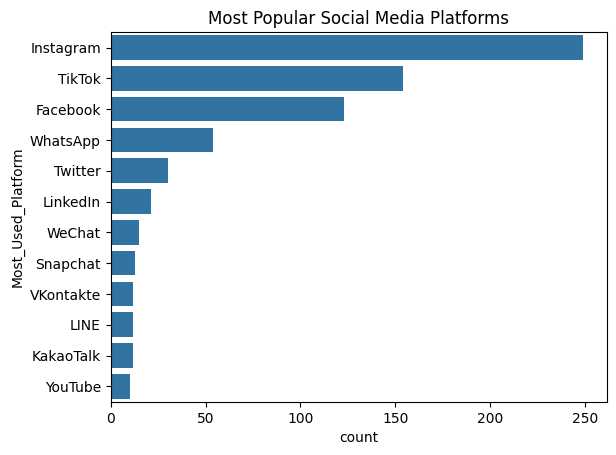

In [35]:
# Let's find wich social media app is used by most of the students
sns.countplot(y='Most_Used_Platform', data=data, order=data['Most_Used_Platform'].value_counts().index)
plt.title("Most Popular Social Media Platforms")
plt.show()

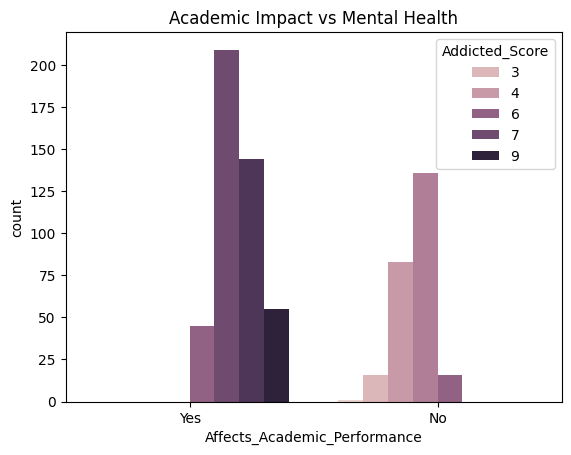

In [117]:
sns.countplot(x='Affects_Academic_Performance', data=data , hue="Addicted_Score")
plt.title("Academic Impact vs Mental Health")
plt.show()

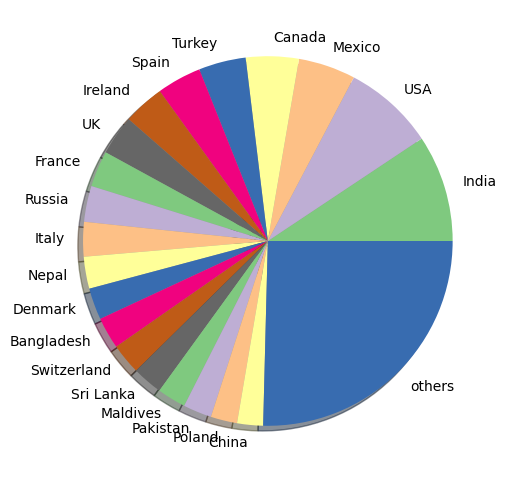

In [102]:
# pie chart of countries used mobile per hours

AvgHoursByCountry = data.groupby('Country')["Avg_Daily_Usage_Hours"].sum()

sorted_country = AvgHoursByCountry.sort_values(ascending=False)
top = sorted_country[:20]
other = sorted_country[20:]

top["others"] = other.sum()

# now a top series is created with data of most phone using top 20 countries with row other as sum of remaining countries

plt.figure(figsize=(12,6))

colors = plt.get_cmap("Accent").colors

plt.pie(
    top,
    labels=top.index,
    shadow=True,
    colors=colors
    )
plt.show()

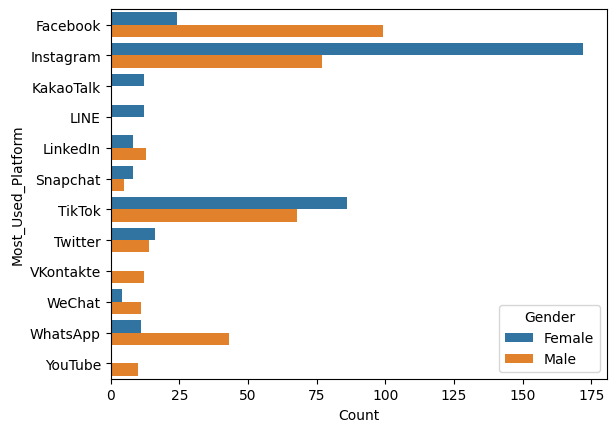

In [110]:
df = data
app_gender_counts = df.groupby(["Most_Used_Platform", "Gender"]).size().reset_index(name="Count")

# Plot
sns.barplot(
    data=app_gender_counts,
    y = "Most_Used_Platform",
    x = "Count",
    hue="Gender"
)

plt.show()